In [1]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import datetime
from IPython.display import display

In [2]:
project_states = pd.read_csv('project-states-15-sep-2021.csv', engine="python", delimiter ='\;')
class_7d = pd.read_csv('classifications-7-days-kobi-16-sep-2021.csv', delimiter = ';')
project_state_dict = {
    0: 'paused',
    1: 'finished'
}

project_states['state'] = project_states['state'].apply(lambda x: project_state_dict[x] if x in project_state_dict.keys() else 'active')

In [3]:
project_states.head()

,id,display_name,launch_date,state
0,5856,Southern Weather Discovery,2018-10-19 13:05:04.568858,paused
1,11402,FrogSong,2021-01-26 15:00:59.785477,active
2,10232,Snowflake ID,2021-08-10 15:43:06.356364,paused
3,7929,Planet Hunters TESS,2018-12-06 18:32:10.688484,active
4,6615,Rodent Little Brother: Secret Lives of Mice,2019-07-08 13:56:47.836319,paused


In [4]:
class_7d


,event_id,project_id,user_id,created_at,session_time
0,360139554,9532,2355710,2021-09-15 20:43:50.74287,799
1,360140363,9532,2355710,2021-09-15 20:46:41.184972,170
2,360141514,9532,2355710,2021-09-15 20:50:57.900403,256
3,360142269,9532,2355710,2021-09-15 20:53:49.11485,128
4,360142976,9532,2355710,2021-09-15 20:56:24.14991,157
...,...,...,...,...,...
1543402,360050059,15650,2355961,2021-09-15 15:29:08.943041,3
1543403,360050060,7929,503779,2021-09-15 15:29:09.923338,7
1543404,360050061,4996,2279693,2021-09-15 15:29:09.923338,12
1543405,360050062,7273,2355675,2021-09-15 15:29:09.923338,17


In [5]:
def plot_with_interpolation(x_data, y_data, title, xlabel, ylabel,figsize=(6, 4)):
    fig, ax = plt.subplots(figsize=figsize)

    y_axis = np.arange(0, x_data)
    x_axis = np.array(list(y_data))
    f = interpolate.interp1d(y_axis, x_axis)
    xnew = np.arange(0, x_data - 1, 0.1)
    ynew = f(xnew)

    ax.plot(x_axis, y_axis, ynew, xnew, '-')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

# User activity distribution

We plot the number of activities each user had and plot a graph, from the result it is clear that we have a 
<br>small subset of super users and the mean activity of users is considerably low compare to them.


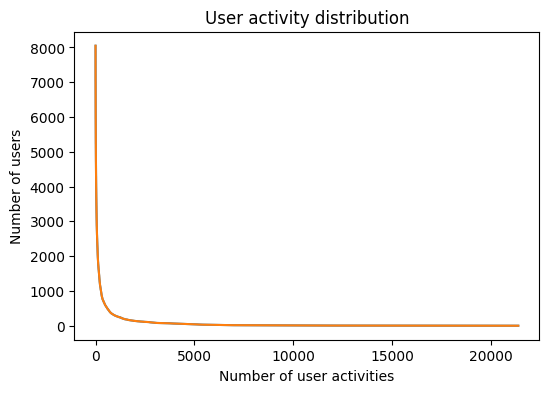

In [6]:
import matplotlib.pyplot as plt
from scipy import interpolate

user_id_count_dict = class_7d['user_id'].value_counts().to_dict()
users_count = len(class_7d['user_id'].unique())
plot_title = 'User activity distribution'
plot_xlabel = 'Number of user activities'
plot_ylabel = 'Number of users'
plot_with_interpolation(users_count, user_id_count_dict.values(), plot_title, plot_xlabel, plot_ylabel)

In [223]:
class_7d

,event_id,project_id,user_id,created_at,session_time,date,dayweek
0,360139554,9532,2355710,2021-09-15 20:43:50.742870,799,09/15/2021,2
1,360140363,9532,2355710,2021-09-15 20:46:41.184972,170,09/15/2021,2
2,360141514,9532,2355710,2021-09-15 20:50:57.900403,256,09/15/2021,2
3,360142269,9532,2355710,2021-09-15 20:53:49.114850,128,09/15/2021,2
4,360142976,9532,2355710,2021-09-15 20:56:24.149910,157,09/15/2021,2
...,...,...,...,...,...,...,...
1543402,360050059,15650,2355961,2021-09-15 15:29:08.943041,3,09/15/2021,2
1543403,360050060,7929,503779,2021-09-15 15:29:09.923338,7,09/15/2021,2
1543404,360050061,4996,2279693,2021-09-15 15:29:09.923338,12,09/15/2021,2
1543405,360050062,7273,2355675,2021-09-15 15:29:09.923338,17,09/15/2021,2


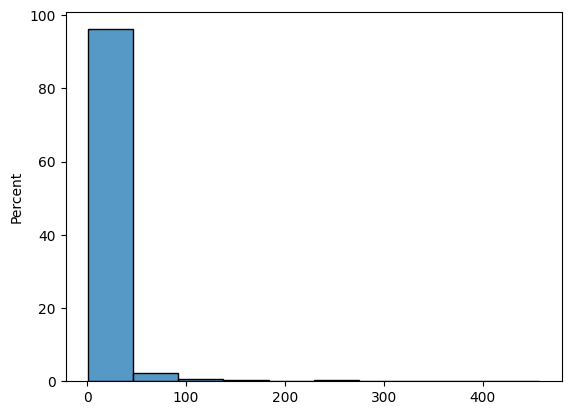

In [246]:
tmp = class_7d.groupby(['user_id']).size().value_counts().to_dict()
sorted_dict = dict(sorted(tmp.items(), key=lambda item: item[0]))
sns.histplot(sorted_dict, stat='percent', bins=10)
plt.show()

In [253]:
test = pd.DataFrame({'activities': list(sorted_dict.keys()), 'users': list(sorted_dict.values())})
test

,activities,users
0,1,457
1,2,302
2,3,271
3,4,234
4,5,208
...,...,...
922,12274,1
923,12846,1
924,14397,1
925,15329,1


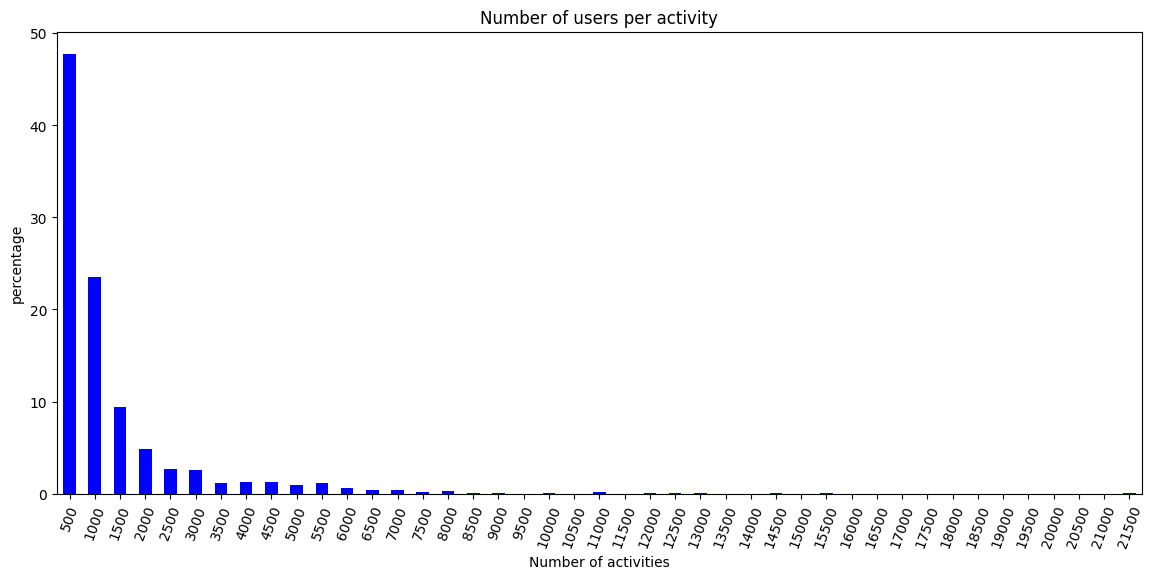

In [301]:
out =  pd.cut(test['activities'], bins=[i for i in range(0, 21501, 500)], include_lowest=True)
out_norm = out.value_counts(sort=False, normalize=True).mul(100)
ax = out_norm.plot.bar(rot=0, color="b", figsize=(14,6))
plt.xticks(rotation=70)
ax.set_xticklabels([round(c.right) for c in out.cat.categories])
plt.ylabel("percentage")
ax.set_title("Number of users per activity")
plt.xlabel("Number of activities")
plt.show()

In [292]:
c = out.cat.categories[0]
c.right

428.52

In [264]:
class_7d['user_id'].value_counts()

1810764    21377
2350887    15329
135        14397
2334063    12846
2349842    12274
           ...  
2353545        1
1655458        1
1191167        1
527484         1
2355969        1
Name: user_id, Length: 8051, dtype: int64

# entries each day of the week
Along with user activity we would like to observe the histogram of activities, unique users and unique project<br> 
related to the day of the week, this can help us understand when the masses of users spend most time on the site.
<br>
In the future we might be able to derive feature that will help us suggest project, for example we probably dont want to<br>
suggest a long and demending project to a user before saturday\sunday as they might just leave it and won't return to it.

In [9]:
class_7d['created_at'] = pd.to_datetime(class_7d['created_at'])
class_7d['date'] = class_7d['created_at'].apply(lambda date: date.strftime("%m/%d/%Y"))
class_7d

,event_id,project_id,user_id,created_at,session_time,date
0,360139554,9532,2355710,2021-09-15 20:43:50.742870,799,09/15/2021
1,360140363,9532,2355710,2021-09-15 20:46:41.184972,170,09/15/2021
2,360141514,9532,2355710,2021-09-15 20:50:57.900403,256,09/15/2021
3,360142269,9532,2355710,2021-09-15 20:53:49.114850,128,09/15/2021
4,360142976,9532,2355710,2021-09-15 20:56:24.149910,157,09/15/2021
...,...,...,...,...,...,...
1543402,360050059,15650,2355961,2021-09-15 15:29:08.943041,3,09/15/2021
1543403,360050060,7929,503779,2021-09-15 15:29:09.923338,7,09/15/2021
1543404,360050061,4996,2279693,2021-09-15 15:29:09.923338,12,09/15/2021
1543405,360050062,7273,2355675,2021-09-15 15:29:09.923338,17,09/15/2021


In [10]:
date_groups = class_7d.groupby(['date'])
weekdays_summary = {}
datetime_weekday_dict = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
weekdays = []
users = []
projects = []
entries = []

for name, group in date_groups:
    unique_users = group['user_id'].unique()
    unique_projects = group['project_id'].unique()
    total_activity = len(group)
    data = {
        'users': len(unique_users),
        'projects': len(unique_projects),
        'total_entries': total_activity
    }
    weekday = datetime.datetime.strptime(name, "%m/%d/%Y").weekday()
    weekdays.append(datetime_weekday_dict[weekday])
    users.append(len(unique_users))
    projects.append(len(unique_projects))
    entries.append(total_activity)
    weekdays_summary[datetime_weekday_dict[weekday]] = data

In [11]:
weekdays_summary

{'Thursday': {'users': 1052, 'projects': 133, 'total_entries': 96726},
 'Friday': {'users': 2198, 'projects': 163, 'total_entries': 206727},
 'Saturday': {'users': 1341, 'projects': 138, 'total_entries': 174653},
 'Sunday': {'users': 1419, 'projects': 130, 'total_entries': 174466},
 'Monday': {'users': 2140, 'projects': 159, 'total_entries': 210245},
 'Tuesday': {'users': 2424, 'projects': 172, 'total_entries': 245281},
 'Wednesday': {'users': 2381, 'projects': 166, 'total_entries': 233132}}

In [12]:
def sns_barplot(x, y, xlabel, ylabel, title, figsize=(8, 4)):
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    sns.barplot(x=x, y=y, ax=ax)
    plt.show()

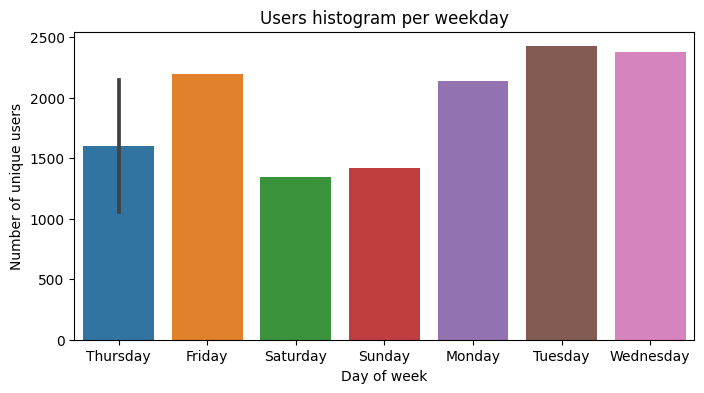

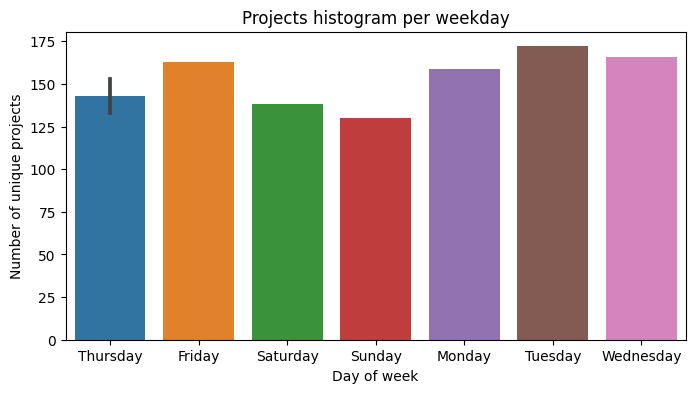

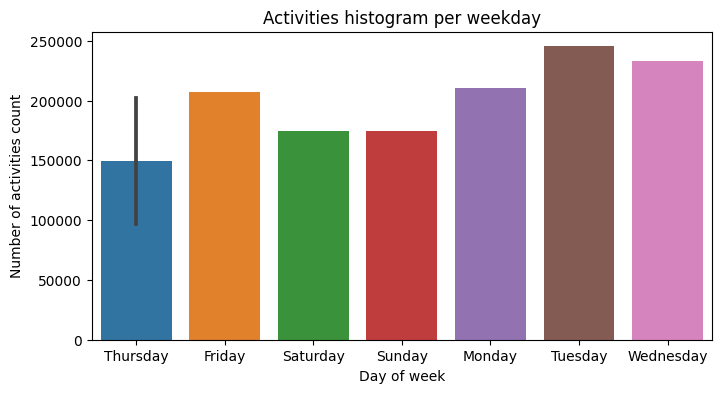

In [13]:
sns_barplot(weekdays, users, "Day of week", "Number of unique users", "Users histogram per weekday")
sns_barplot(weekdays, projects, "Day of week", "Number of unique projects", "Projects histogram per weekday")
sns_barplot(weekdays, entries, "Day of week", "Number of activities count", "Activities histogram per weekday")

# Unique users per project

In [14]:
unique_users_per_project = class_7d.groupby(['project_id'])['user_id'].nunique().to_dict()

In [15]:
def sns_barplot_sorted(data, title, xlbl, ylbl, xticks_steps=20, desc=True, x=None):
    fig, ax = plt.subplots(figsize=(12, 6))

    sorted_data = list(data)
    sorted_data.sort(reverse=desc)
    ax.set_title(title)
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)
    if x is None:
        x = list(np.arange(0, len(sorted_data)))
    g = sns.barplot(x=x, y=sorted_data)
    g.set_xticks(np.arange(0, len(sorted_data), xticks_steps))
    plt.show()

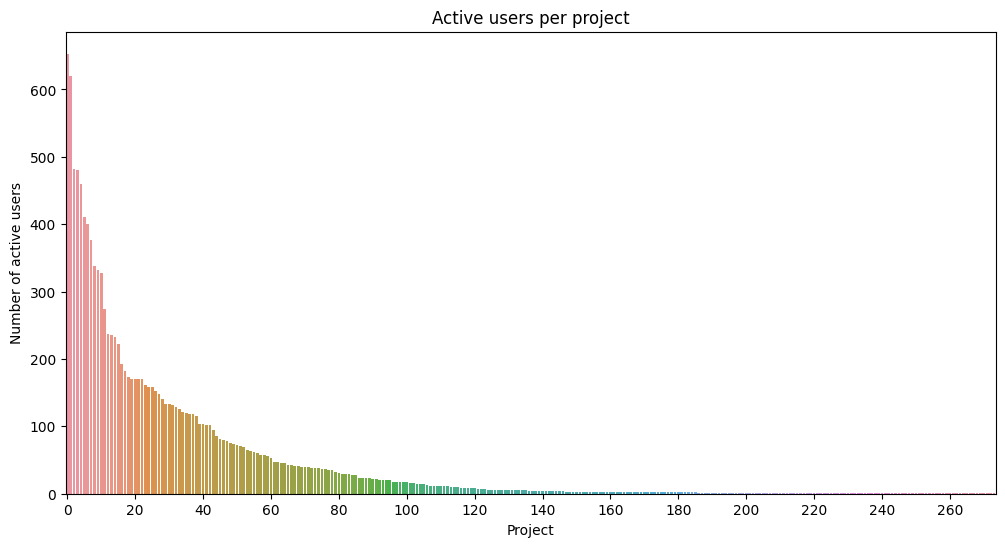

In [302]:
title = 'Active users per project'
xlbl = 'Project'
ylbl = 'Number of active users'
sns_barplot_sorted(list(unique_users_per_project.values()), title, xlbl, ylbl)

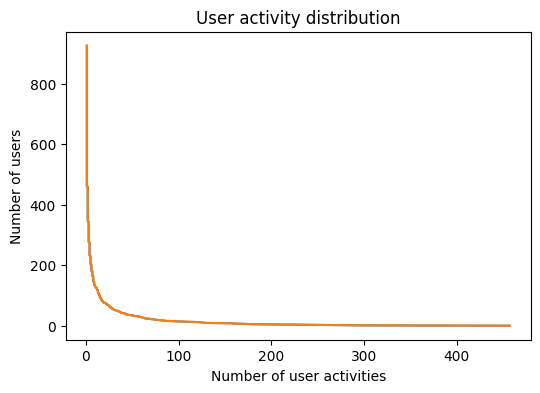

In [303]:
plot_with_interpolation(len(tmp), tmp.values(), plot_title, plot_xlabel, plot_ylabel)

In [304]:
from collections import Counter

tmp = dict(Counter(user_id_count_dict.values()))


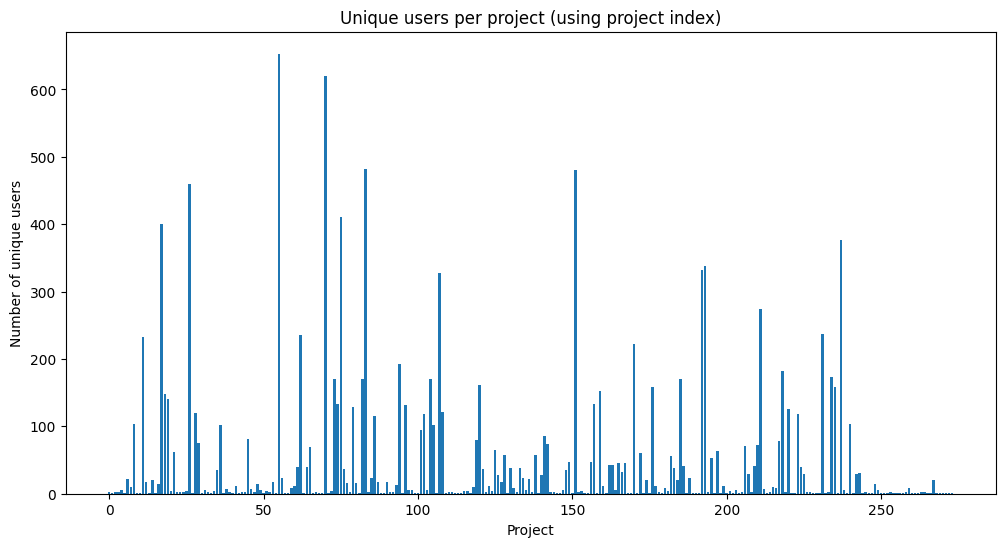

In [305]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title('Unique users per project (using project index)')
ax.set_xlabel('Project')
ax.set_ylabel('Number of unique users')
ax.bar(np.arange(0, len(unique_users_per_project.values())), unique_users_per_project.values())
plt.show()

# Unique projects by users
This will be an histogram that counts the unique projects each user had worked on during the given span of a week.

In [306]:
projects_per_user = class_7d.groupby(['user_id'])['project_id'].nunique()
groupby_projects_per_user = projects_per_user.value_counts()
groupby_projects_per_user

1     5766
2     1226
3      504
4      240
5      134
6       63
7       40
8       21
9       18
10       8
16       4
13       4
17       4
12       4
14       4
11       3
15       2
33       1
19       1
20       1
21       1
22       1
34       1
Name: project_id, dtype: int64

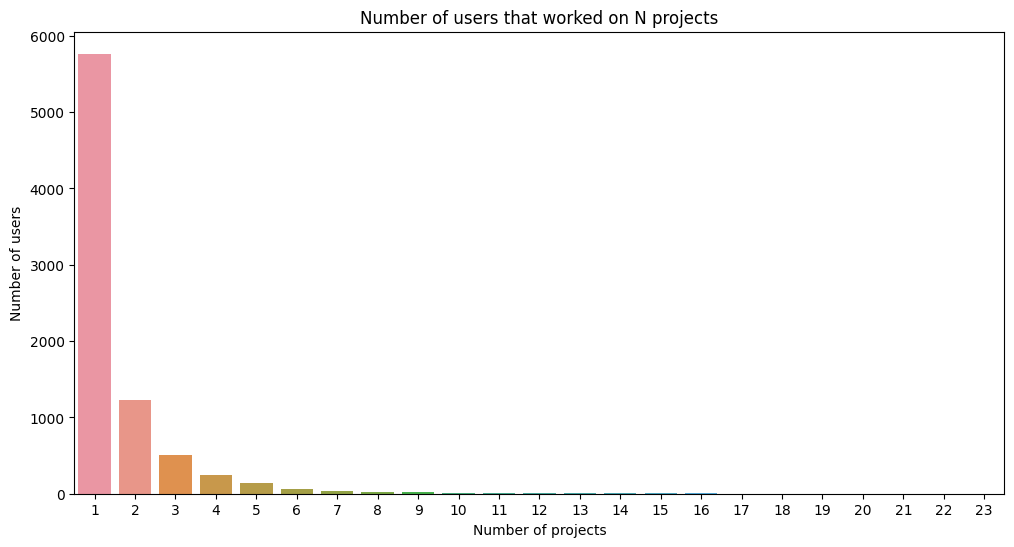

In [307]:
title = 'Number of users that worked on N projects'
xlbl = 'Number of projects'
ylbl = 'Number of users'
sns_barplot_sorted(list(groupby_projects_per_user), title, xlbl, ylbl, xticks_steps=1,x=np.arange(1, len(groupby_projects_per_user) + 1))

# Session time exploration
Session time refers to the time it took a user to make the classification for that given event of project.
session time varries alot and it might be because users leave there system running with the site open and then come back to classifiy.

### Session time per project

In [ ]:
project_sess_mean = class_7d.groupby(['project_id'])['session_time'].mean()

In [ ]:
title = 'Mean session time per project'
xlbl = 'Project index'
ylbl = 'Mean session time across users'
sns_barplot_sorted(project_sess_mean, title, xlbl, ylbl)

In [ ]:
n_std = 2
mean_p = project_sess_mean.mean()
std_p = project_sess_mean.std()
cleaned_data = project_sess_mean[project_sess_mean < mean_p + n_std * std_p]
cleaned_data = cleaned_data[cleaned_data > mean_p - n_std * std_p]
lost_rows = len(project_sess_mean) - len(cleaned_data)
title = f'Mean session time per project (cleaned data lost {lost_rows} rows)\nRemoved rows with deviation of more then {n_std} stds'
xlbl = 'Project index'
ylbl = 'Mean session time across users'
sns_barplot_sorted(cleaned_data, title, xlbl, ylbl)

In [ ]:
project_sess_sum = class_7d.groupby(['project_id'])['session_time'].sum()

title = 'Total session time per project'
xlbl = 'Project index'
ylbl = 'Total session time across users'
sns_barplot_sorted(project_sess_sum, title, xlbl, ylbl)

In [ ]:
n_std = 2
mean_p = project_sess_sum.mean()
std_p = project_sess_sum.std()
cleaned_data = project_sess_sum[project_sess_sum < mean_p + n_std * std_p]
cleaned_data = cleaned_data[cleaned_data > mean_p - n_std * std_p]
lost_rows = len(project_sess_mean) - len(cleaned_data)
title = f'Total session time per project (cleaned data lost {lost_rows} rows)\nRemoved rows with deviation of more then {n_std} stds'
xlbl = 'Project index'
ylbl = 'Total session time across users'
sns_barplot_sorted(cleaned_data, title, xlbl, ylbl)

In [ ]:
len(project_sess_mean)

# TOP N projects piecharts

In [18]:
class_7d
class_7d['dayweek'] = class_7d['date'].apply(lambda date: datetime.datetime.strptime(date, "%m/%d/%Y").weekday())

In [19]:
class_7d

,event_id,project_id,user_id,created_at,session_time,date,dayweek
0,360139554,9532,2355710,2021-09-15 20:43:50.742870,799,09/15/2021,2
1,360140363,9532,2355710,2021-09-15 20:46:41.184972,170,09/15/2021,2
2,360141514,9532,2355710,2021-09-15 20:50:57.900403,256,09/15/2021,2
3,360142269,9532,2355710,2021-09-15 20:53:49.114850,128,09/15/2021,2
4,360142976,9532,2355710,2021-09-15 20:56:24.149910,157,09/15/2021,2
...,...,...,...,...,...,...,...
1543402,360050059,15650,2355961,2021-09-15 15:29:08.943041,3,09/15/2021,2
1543403,360050060,7929,503779,2021-09-15 15:29:09.923338,7,09/15/2021,2
1543404,360050061,4996,2279693,2021-09-15 15:29:09.923338,12,09/15/2021,2
1543405,360050062,7273,2355675,2021-09-15 15:29:09.923338,17,09/15/2021,2


In [20]:
def get_original_projects_name(id_dict, df_projects):
    tmp = {}
    for key in id_dict.keys():
        new_key = df_projects.loc[df_projects['id'] == key]['display_name'].values[0]
        value = id_dict[key]
        tmp[new_key] = value
    return tmp

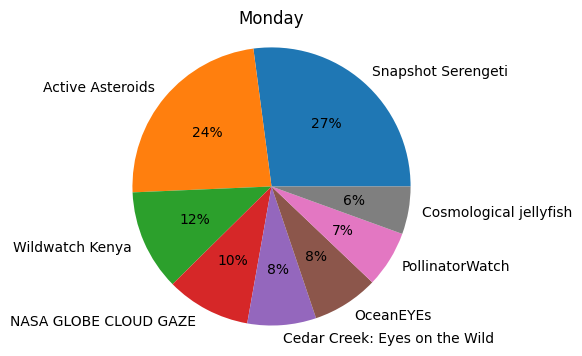

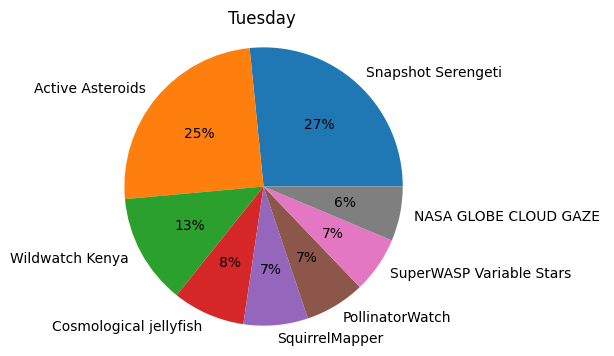

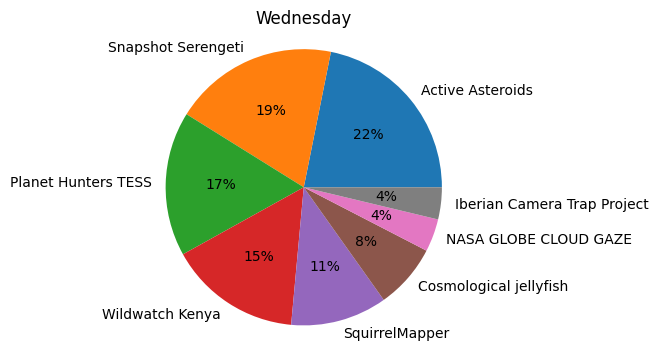

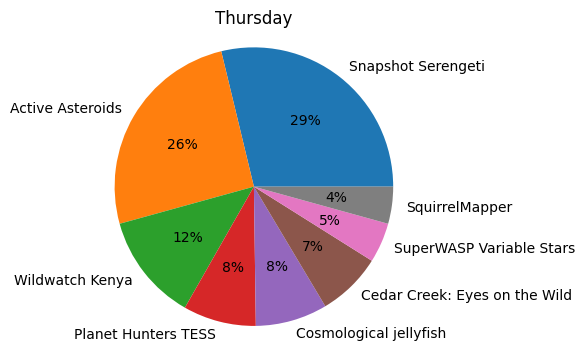

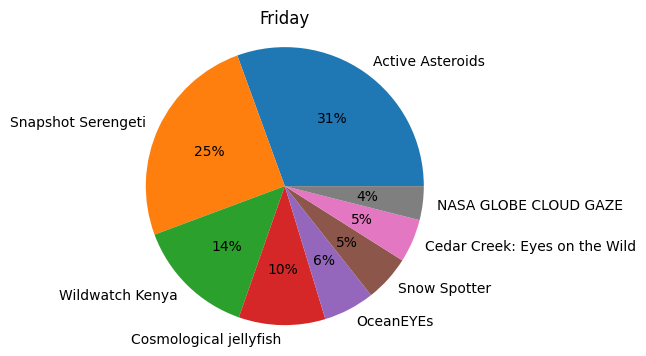

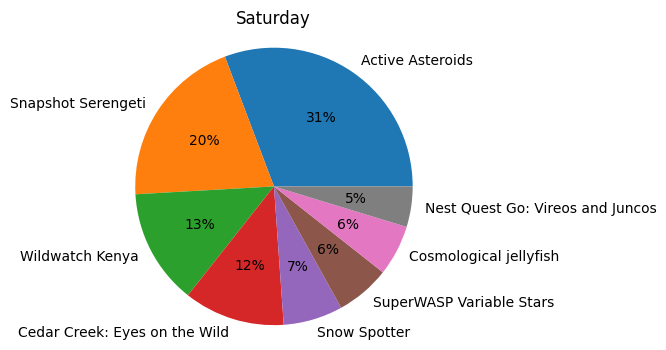

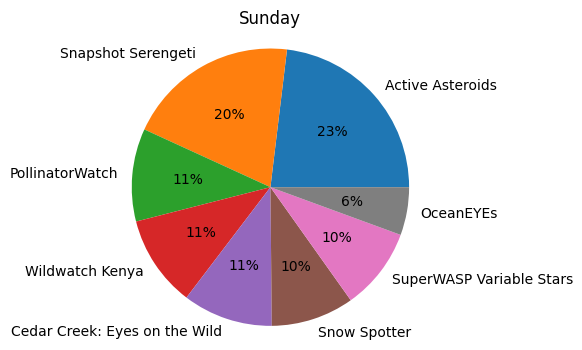

In [27]:
n_project = 8

for name, group in class_7d.groupby('dayweek'):
    fig, ax = plt.subplots(figsize=(6, 4))
    labels = []
    sizes = []
    weekly_topN_projects = group.groupby(['project_id']).size().sort_values(ascending=False)[:n_project].to_dict()
    weekly_topN_projects = get_original_projects_name(weekly_topN_projects, project_states)
    for x, y in weekly_topN_projects.items():
        labels.append(x)
        sizes.append(y)
    ax.pie(sizes, labels=labels, autopct='%1.0f%%')
    ax.axis('equal')
    ax.set_title(f'{datetime_weekday_dict[name]}')
    plt.show()

# Hours of activity

In [28]:
class_7d

,event_id,project_id,user_id,created_at,session_time,date,dayweek
0,360139554,9532,2355710,2021-09-15 20:43:50.742870,799,09/15/2021,2
1,360140363,9532,2355710,2021-09-15 20:46:41.184972,170,09/15/2021,2
2,360141514,9532,2355710,2021-09-15 20:50:57.900403,256,09/15/2021,2
3,360142269,9532,2355710,2021-09-15 20:53:49.114850,128,09/15/2021,2
4,360142976,9532,2355710,2021-09-15 20:56:24.149910,157,09/15/2021,2
...,...,...,...,...,...,...,...
1543402,360050059,15650,2355961,2021-09-15 15:29:08.943041,3,09/15/2021,2
1543403,360050060,7929,503779,2021-09-15 15:29:09.923338,7,09/15/2021,2
1543404,360050061,4996,2279693,2021-09-15 15:29:09.923338,12,09/15/2021,2
1543405,360050062,7273,2355675,2021-09-15 15:29:09.923338,17,09/15/2021,2


In [145]:
a = class_7d.groupby(['user_id'])['dayweek'].nunique()
b = class_7d.groupby(['user_id'])['event_id'].size()

In [146]:
df = pd.concat([a, b], axis=1)
df['event_id_norm'] = df['event_id'] / df['dayweek']
df['dayweek_nrom'] = df['dayweek'] / 7
df

,dayweek,event_id,event_id_norm,dayweek_nrom
user_id,,,,
6,1,10,10.000000,0.142857
35,1,1,1.000000,0.142857
42,3,299,99.666667,0.428571
54,2,59,29.500000,0.285714
66,3,73,24.333333,0.428571
...,...,...,...,...
2356394,1,40,40.000000,0.142857
2356397,1,62,62.000000,0.142857
2356404,1,220,220.000000,0.142857


In [147]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=0).fit(df)
df['label'] = kmeans.labels_
# kmeans.predict([[0, 0], [12, 3]])

In [148]:
df['label'].value_counts()

0    7910
1     130
2      11
Name: label, dtype: int64

In [149]:
# df['label'] = df['label'].apply(lambda lbl: 'week' if lbl == 0 else 'strong')

In [150]:
df

,dayweek,event_id,event_id_norm,dayweek_nrom,label
user_id,,,,,
6,1,10,10.000000,0.142857,0
35,1,1,1.000000,0.142857,0
42,3,299,99.666667,0.428571,0
54,2,59,29.500000,0.285714,0
66,3,73,24.333333,0.428571,0
...,...,...,...,...,...
2356394,1,40,40.000000,0.142857,0
2356397,1,62,62.000000,0.142857,0
2356404,1,220,220.000000,0.142857,0


In [220]:
first_line = df.groupby(['label', 'dayweek'])['event_id_norm'].max()[0].to_dict()
sec_line = df.groupby(['label', 'dayweek'])['event_id_norm'].max()[1].to_dict()

In [221]:
list(first_line.keys())

[1, 2, 3, 4, 5, 6, 7]

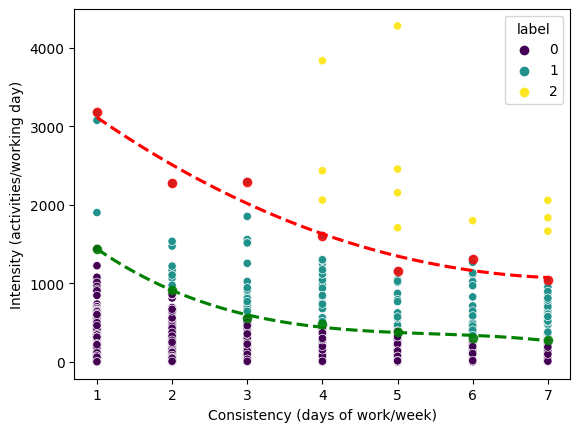

In [222]:
ax = sns.scatterplot(data=df, x="dayweek", y="event_id_norm", hue='label', palette=sns.color_palette("viridis", as_cmap=True))
sns.regplot(x=list(first_line.keys()), y=list(first_line.values()),order=3, ci=None, color='green', ax=ax)
ax.lines[0].set_linestyle("--")
sns.regplot(x=list(sec_line.keys()), y=list(sec_line.values()),order=3, ci=None, color='red', ax=ax)
ax.lines[1].set_linestyle("--")
ax.set_xlabel('Consistency (days of work/week)')
ax.set_ylabel('Intensity (activities/working day)')
plt.show()